In [104]:
! ../.g

[master 241e859] web
 1 file changed, 4 insertions(+)
Counting objects: 4, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (4/4), done.
Writing objects: 100% (4/4), 532 bytes | 532.00 KiB/s, done.
Total 4 (delta 3), reused 0 (delta 0)
remote: Resolving deltas: 100% (3/3), completed with 3 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   f78432d..241e859  master -> master


# Régression linéaire


En statistiques, en économétrie et en apprentissage automatique, 
un modèle de régression linéaire est un modèle de régression
qui cherche à établir une relation linéaire entre une variable, dite expliquée,
et une ou plusieurs variables, dites explicatives.

On parle aussi de modèle linéaire ou de modèle de régression linéaire.

Parmi les modèles de régression linéaire, le plus simple est l'ajustement affine. 
Celui-ci consiste à rechercher la droite permettant d'expliquer le comportement 
d'une variable statistique $y$ comme étant une fonction affine d'une autre variable statistique $x$.


Le modèle de régression linéaire est souvent estimé par la méthode des moindres carrés mais 
il existe aussi de nombreuses autres méthodes pour estimer ce modèle. 
On peut par exemple estimer le modèle par maximum de vraisemblance ou encore par inférence bayésienne.


---

# Notation simple (ou scalaire)


On considère le modèle pour l'individu i. Pour chaque individu, la variable expliquée s'écrit comme une fonction linéaire des variables explicatives.

$y_{i}=\beta _{0}+\beta _{1}x_{i,1}+\ldots +\beta _{K}x_{i,K}+\varepsilon _{i}$

où $y_{i}$ et les $x_{i,1}$ sont fixes et $\varepsilon _{i}$ représente l'erreur.

L'objectif est de trouver le choix de $\beta _{i}$ 
qui minimise **l'erreur total** $\sum \| \varepsilon _{i}\|^2$
qui est fonction quadratiques des $\beta _{i}$.

# Notation matricielle

Enfin, on rencontre aussi souvent une notation matricielle.
Ici, on écrit le modèle pour chacun des n individus présents dans l'échantillon. Le modèle s'écrit alors :

$ Y= \beta.X +\varepsilon $

ici il faut voir $\beta$ comme application affine 
et on cherche l'application qui minimise  $\sum \| \varepsilon _{i}\|^2$.

Pour **une erreur total** de type moindre moindres carrés 
on peut 
- exprimer l'erreur en termes de coefficients de la matrice de $\beta$
- trouver l'unique point critique de la fonction
$\beta \mapsto \sum \| \varepsilon _{i}(\beta) \|^2$
- exprimer les $\beta_{ij}$ en termes des $x_{ij}$.



LinregressResult(slope=4.927848890118481, intercept=1.368093594727057, rvalue=0.9856838567710052, pvalue=1.806348934279432e-07, stderr=0.29801821866802336, intercept_stderr=1.590981920624732)

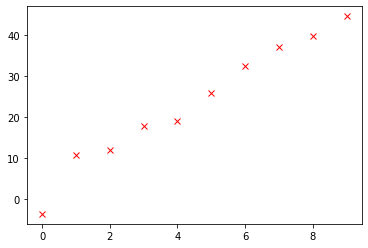

In [30]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

n = 10
X = np.arange(n)
Y = 5*X + 10*(np.random.rand(n) - .5) + 1

plt.plot(X,Y, 'rx');
         
stats.linregress(X,Y)



---

# Using sklearn

We'll start with the problem in one dimension.
There is a standard procedure in ML 

- create an instance of the model (LinearRegression)
- fit the data to obtain a coefficients (weights)
- make predictions using the weights



In [31]:
from sklearn.linear_model import LinearRegression

X = X.reshape(-1, 1)
Y = Y.reshape(-1, 1)
reg = LinearRegression().fit(X, Y)
reg.score(X, Y),  reg.coef_, reg.intercept_


(0.9715726654989634, array([[4.92784889]]), array([1.36809359]))

In [32]:
reg.predict(np.array([[0],[10]]))

array([[ 1.36809359],
       [50.6465825 ]])

In [33]:
n = 100
X = np.random.rand(2,n)
B = np.array([2,1])
Y = B.dot(X) + .5*(np.random.rand(n) - .5) + 1

array([[0.19530354, 0.21018663, 0.24083739, 0.24673729, 0.40343173,
        0.39704089, 0.52870857, 0.20749193, 0.27221809, 0.57168803],
       [0.15298008, 0.22321705, 0.72438913, 0.14951491, 0.62637499,
        0.59166534, 0.68815443, 0.59356279, 0.81939056, 0.49074607]])

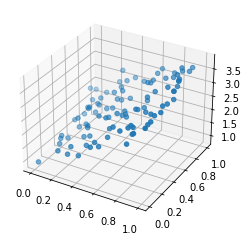

In [34]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

pts =  np.ravel(np.meshgrid(np.linspace(0,1,3), np.linspace(0,1,3) )).reshape(2,-1)


xs, ys = X
ax.scatter(xs, ys, Y);



In [154]:
reg.predict(pts.T).T[0]

array([0.95954106, 1.9879631 , 3.01638514, 1.4712261 , 2.49964814,
       3.52807018, 1.98291115, 3.01133319, 4.03975523])

In [107]:
reg = LinearRegression().fit(X.T, Y.reshape(-1,1))
reg.score(X.T, Y.reshape(-1,1)),  reg.coef_, reg.intercept_

(0.9546318328346812, array([[2.05684408, 1.02337009]]), array([0.95954106]))

In [73]:
B - reg.coef_[0]

array([0.00054261, 0.0147567 ])

# Real world example

I found his [here](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html)

## Systolic Blood Pressure Data

The data (X1, X2, X3) are for each patient.
- X1 = systolic blood pressure
- X2 = age in years
- X3 = weight in pounds

In [13]:
import pandas as pd

In [49]:
df = pd.read_excel('https://macbuse.github.io/PROG/mlr02.xls')

#df = pd.read_excel('./mlr02.xls')

In [8]:
ls *xls

mlr02.xls


In [50]:
df.head()

X1  X2   X3
0  132  52  173
1  143  59  184
2  153  67  194
3  162  73  211
4  154  64  196

In [51]:
df = df.rename(columns={'X1': 'tension', 'X2': 'age', 'X3' : 'poids'})

In [53]:
df['poids'] = df['poids']/2.2

In [54]:
X = df[['age','poids']].values
Y = df['tension']
df


tension  age       poids
0       132   52   78.636364
1       143   59   83.636364
2       153   67   88.181818
3       162   73   95.909091
4       154   64   89.090909
5       168   74  100.000000
6       137   54   85.454545
7       149   61   85.454545
8       159   65   94.090909
9       128   46   75.909091
10      166   72   98.636364

In [55]:
reg = LinearRegression().fit(X, Y)
reg.score(X, Y),  reg.coef_, reg.intercept_

(0.9768471041502091, array([0.86141469, 0.73669023]), 30.994102952348314)

In [59]:
reg.predict(np.array([[50,68]]) )

array([124.15977317])

---

# Exo

Do some of the other data sets [download them here](https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/frames/frame.html)

- Thunder Basin Antelope Study
- Test Scores for General Psychology
- Hollywood Movies
- All Greens Franchise
- Crime
- Health
- Baseball
- Basketball
- Using Technology: U.S. Economy Case Study



ls---



# Régression logistique


La régression logistique ou modèle logit est un modèle de régression binomiale. Comme pour tous les modèles de régression binomiale, il s'agit de modéliser au mieux un modèle mathématique simple à des observations réelles nombreuses. En d'autres termes d'associer à un vecteur de variables aléatoires
$ (x_{1},\ldots ,x_{K})$ 
une variable aléatoire binomiale génériquement notée $y$. La régression logistique constitue un cas particulier de modèle linéaire généralisé. Elle est largement utilisée en apprentissage automatique.

## Notations

Soit $Y$ la variable à prédire (variable expliquée) et $ (x_{1},\ldots ,x_{K})$ les variables prédictives (variables explicatives).

Dans le cadre de la régression logistique binaire, 
- la variable $Y$ prend deux modalités possibles
$\{1,0\}$. 
- les variables $ (x_{1},\ldots ,x_{K})$ sont exclusivement continues ou binaires.



## Matrice de confusion

L’objectif étant de produire un modèle permettant de prédire avec le plus de précision possible les valeurs prises par une variable catégorielle $Y$, une approche privilégiée pour évaluer la qualité du modèle serait de confronter les valeurs prédites avec les vraies valeurs prises par $Y$ : c’est le rôle de la matrice de confusion. On en déduit alors un indicateur simple, le taux d’erreur ou le taux de mauvais classement, qui est le rapport entre le nombre de mauvaises prédictions et la taille de l’échantillon.

Lorsque la matrice de confusion est construite sur les données qui ont servi à élaborer le modèle, le taux d’erreur est souvent trop optimiste, ne reflétant pas les performances réelles du modèle dans la population. Pour que l’évaluation ne soit pas biaisée, il est conseillé de construire cette matrice sur un échantillon à part, dit échantillon de test. Par opposition à l’échantillon d’apprentissage, il n’aura pas participé à la construction du modèle.

Le principal intérêt de cette méthode est qu’elle permet de comparer n’importe quelle méthode de classement et sélectionner ainsi celle qui s’avère être la plus performante face à un problème donné.

---


# Read the full theory

on [wikipedia](https://fr.wikipedia.org/wiki/R%C3%A9gression_logistique)


# Exo 

Once you have gone through the code below

1. Use the code to recognise my hand writing

![here](./digits.jpg)

You are going to have to 

- find each digit in the jpg (you can do this by making the value in every pixel 0 or 1 and using filters)
- resize it to an 8x8 image, for this I use [skimage resize](https://scikit-image.org/docs/dev/api/skimage.transform.html#skimage.transform.resize)

2. Get do a logistic regression to classify [wine](https://github.com/laurenlhoward14/wine-classification)
Get the files [here](https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/)

In [157]:
! ../.g

[master 9427eaf] web
 6 files changed, 11844 insertions(+), 2 deletions(-)
 create mode 100644 PROG/.ipynb_checkpoints/digits-checkpoint.ipynb
 create mode 100644 PROG/.ipynb_checkpoints/winequality-white-checkpoint.csv
 create mode 100644 PROG/digits.ipynb
 create mode 100644 PROG/winequality-red.csv
 create mode 100644 PROG/winequality-white.csv
Counting objects: 8, done.
Delta compression using up to 12 threads.
Compressing objects: 100% (8/8), done.
Writing objects: 100% (8/8), 160.37 KiB | 1.29 MiB/s, done.
Total 8 (delta 4), reused 0 (delta 0)
remote: Resolving deltas: 100% (4/4), completed with 4 local objects.
To https://github.com/macbuse/macbuse.github.io.git
   2216260..9427eaf  master -> master


---

# Digits OCR

Everything else comes from [here](https://atmamani.github.io/projects/ml/implementing-logistic-regression-in-python/)
---

This notebook is broadly adopted from 
[this blog](https://towardsdatascience.com/logistic-regression-using-python-sklearn-numpy-mnist-handwriting-recognition-matplotlib-a6b31e2b166a) and this [scikit-learn example](https://scikit-learn.org/stable/auto_examples/linear_model/plot_sparse_logistic_regression_mnist.html)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Logistic-regression-on-smaller-built-in-subset" data-toc-modified-id="Logistic-regression-on-smaller-built-in-subset-1">Logistic regression on smaller built-in subset</a></span><ul class="toc-item"><li><span><a href="#Load-the-dataset" data-toc-modified-id="Load-the-dataset-1.1">Load the dataset</a></span></li><li><span><a href="#Display-sample-data" data-toc-modified-id="Display-sample-data-1.2">Display sample data</a></span></li><li><span><a href="#Split-into-training-and-test" data-toc-modified-id="Split-into-training-and-test-1.3">Split into training and test</a></span></li><li><span><a href="#Learning" data-toc-modified-id="Learning-1.4">Learning</a></span></li><li><span><a href="#Viewing-coefficients-as-an-image" data-toc-modified-id="Viewing-coefficients-as-an-image-1.5">Viewing coefficients as an image</a></span></li><li><span><a href="#Prediction-and-scoring" data-toc-modified-id="Prediction-and-scoring-1.6">Prediction and scoring</a></span><ul class="toc-item"><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-1.6.1">Confusion matrix</a></span></li><li><span><a href="#Inspecting-misclassified-images" data-toc-modified-id="Inspecting-misclassified-images-1.6.2">Inspecting misclassified images</a></span></li></ul></li></ul></li><li><span><a href="#Predicting-on-full-MNIST-database" data-toc-modified-id="Predicting-on-full-MNIST-database-2">Predicting on full MNIST database</a></span><ul class="toc-item"><li><span><a href="#Preview-some-images" data-toc-modified-id="Preview-some-images-2.1">Preview some images</a></span></li><li><span><a href="#Split-into-training-and-test" data-toc-modified-id="Split-into-training-and-test-2.2">Split into training and test</a></span></li><li><span><a href="#Learning" data-toc-modified-id="Learning-2.3">Learning</a></span><ul class="toc-item"><li><span><a href="#Visualize-coefficients-as-an-image" data-toc-modified-id="Visualize-coefficients-as-an-image-2.3.1">Visualize coefficients as an image</a></span></li></ul></li><li><span><a href="#Prediction-and-scoring" data-toc-modified-id="Prediction-and-scoring-2.4">Prediction and scoring</a></span></li><li><span><a href="#Confusion-matrix" data-toc-modified-id="Confusion-matrix-2.5">Confusion matrix</a></span></li></ul></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-3">Conclusion</a></span></li></ul></div>

## Logistic regression on smaller built-in subset
### Load the dataset

In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
type(digits.data)

numpy.ndarray

In [3]:
(digits.data.shape, digits.target.shape, digits.images.shape)

((1797, 64), (1797,), (1797, 8, 8))

`1797` images, each `8x8` in dimension and `1797` labels.

### Display sample data

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

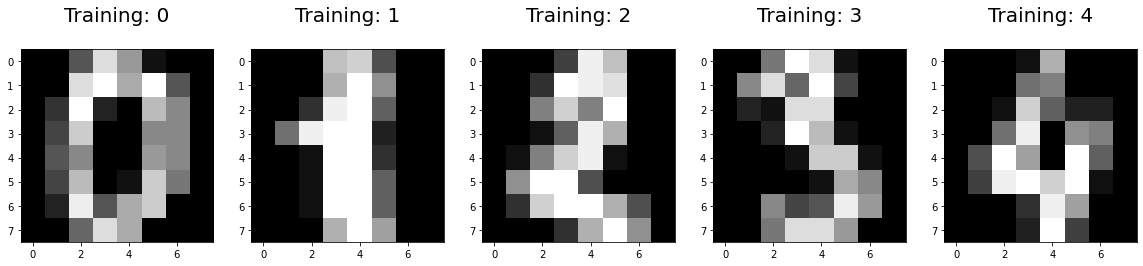

In [5]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], 
                                           digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20);

### Split into training and test

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target,
                                                   test_size=0.25,
                                                   random_state=0)

In [7]:
X_train.shape, X_test.shape

((1347, 64), (450, 64))

### Learning
Refer to the [Logistic reg API ref](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression) for these parameters and the [guide](https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression) for equations, particularly how penalties are applied.

In [8]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)
clf

LogisticRegression(C=50, max_iter=10000, solver='saga')

In [9]:
%%time
clf.fit(X_train, y_train)

CPU times: user 10.6 s, sys: 2.85 ms, total: 10.6 s
Wall time: 10.6 s


LogisticRegression(C=50, max_iter=10000, solver='saga')

Let us see what the classifier has learned

In [10]:
clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [11]:
clf.coef_.shape

(10, 64)

In [12]:
clf.coef_[0].round(2) # prints weights for 8x8 image for class 0

array([ 0.  , -0.  , -0.04,  0.1 ,  0.06, -0.14, -0.16, -0.02, -0.  ,
       -0.03, -0.04,  0.2 ,  0.09,  0.08, -0.05, -0.01, -0.  ,  0.06,
        0.15, -0.03, -0.39,  0.25,  0.09, -0.  , -0.  ,  0.13,  0.16,
       -0.18, -0.57,  0.02,  0.12, -0.  ,  0.  ,  0.16,  0.11, -0.16,
       -0.41,  0.05,  0.08,  0.  , -0.  , -0.06,  0.27, -0.11, -0.2 ,
        0.15,  0.04, -0.  , -0.  , -0.12,  0.08, -0.05,  0.2 ,  0.1 ,
       -0.04, -0.01, -0.  , -0.01, -0.09,  0.21, -0.04, -0.06, -0.1 ,
       -0.05])

In [13]:
clf.intercept_ # for 10 classes - this is a One-vs-All classification

array([ 0.0010181 , -0.07236521,  0.00379207,  0.00459855,  0.04585855,
        0.00014299, -0.00442972,  0.01179654,  0.04413398, -0.03454583])

In [14]:
clf.n_iter_[0] # num of iterations before tolerance was reached

1876

### Viewing coefficients as an image
Since there is a coefficient for each pixel in the `8x8` image, we can view them as an image itself. The code below is similar to the original viz code, but runs on coeff.

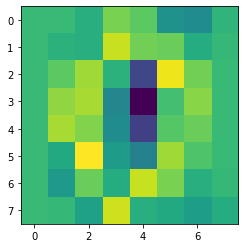

In [16]:
coef = clf.coef_.copy()
plt.imshow(coef[0].reshape(8,8).round(2));  # proof of concept

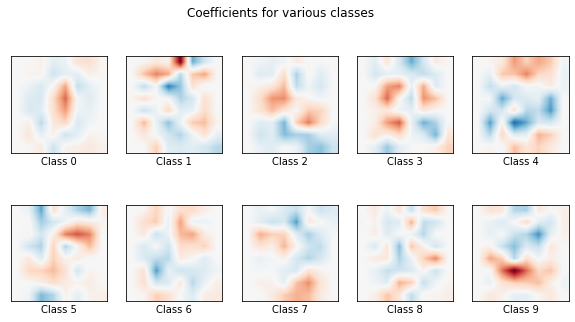

In [17]:
coef = clf.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(10,5))

for i in range(10): # 0-9
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(8,8), 
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(()) # remove ticks
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes');

### Prediction and scoring

Now predict on unknown dataset and compare with ground truth

In [18]:
print(clf.predict(X_test[0:9]))
print(y_test[0:9])

[2 8 2 6 6 7 1 9 8]
[2 8 2 6 6 7 1 9 8]


Score against training and test data

In [19]:
clf.score(X_train, y_train) # training score

1.0

In [20]:
score = clf.score(X_test, y_test) # test score
score

0.9555555555555556

Test **score**: `0.9555`

#### Confusion matrix

In [21]:
from sklearn import metrics

In [22]:
predictions = clf.predict(X_test)

cm = metrics.confusion_matrix(y_true=y_test, 
                         y_pred = predictions, 
                        labels = clf.classes_)
cm

array([[37,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 40,  0,  0,  0,  0,  0,  0,  2,  1],
       [ 0,  0, 42,  2,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 43,  0,  0,  0,  0,  1,  1],
       [ 0,  0,  0,  0, 37,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0, 46,  0,  0,  0,  2],
       [ 0,  1,  0,  0,  0,  0, 51,  0,  0,  0],
       [ 0,  0,  0,  1,  1,  0,  0, 46,  0,  0],
       [ 0,  3,  1,  0,  0,  0,  0,  0, 43,  1],
       [ 0,  0,  0,  0,  0,  1,  0,  0,  1, 45]])

Visualize confusion matrix as a heatmap

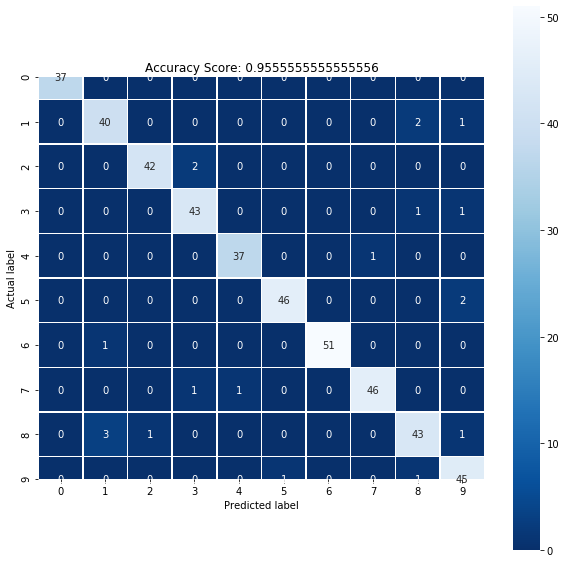

In [23]:
import seaborn as sns

plt.figure(figsize=(10,10))
sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title);

#### Inspecting misclassified images
We compare predictions with labels to find which images are wrongly classified, then display them.

In [24]:
index = 0
misclassified_images = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassified_images.append(index)
    index +=1

In [25]:
print(misclassified_images)

[56, 94, 118, 124, 130, 169, 181, 196, 213, 251, 315, 325, 331, 335, 378, 398, 425, 429, 430, 440]


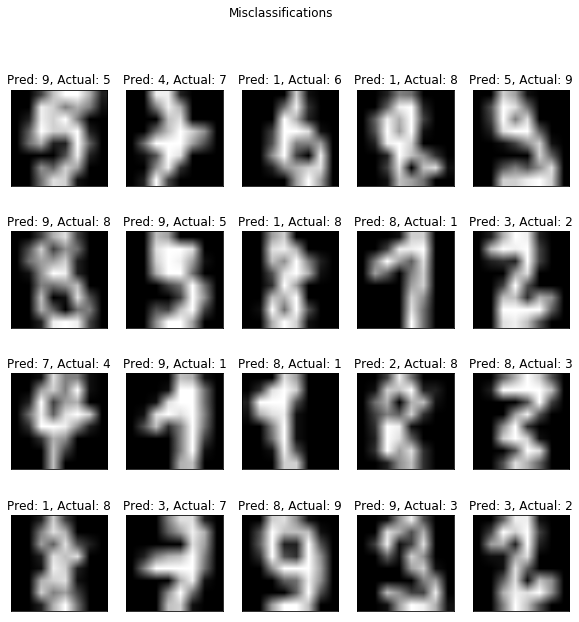

In [26]:
plt.figure(figsize=(10,10))
plt.suptitle('Misclassifications');

for plot_index, bad_index in enumerate(misclassified_images[0:20]):
    p = plt.subplot(4,5, plot_index+1) # 4x5 plot
    
    p.imshow(X_test[bad_index].reshape(8,8), cmap=plt.cm.gray,
            interpolation='bilinear')
    p.set_xticks(()); p.set_yticks(()) # remove ticks
    
    p.set_title(f'Pred: {predictions[bad_index]}, Actual: {y_test[bad_index]}');

## Predicting on full MNIST database
In the previous section, we worked with as tiny subset. In this section, we will download and play with the full MNIST dataset. Downloading for the first time from [open ml db](https://docs.openml.org/) takes me about half a minute. Since this dataset is cached locally, subsequent runs should not take as much.

In [7]:
%%time
from sklearn.datasets import fetch_openml
mnist = fetch_openml(data_id=554) # https://www.openml.org/d/554

CPU times: user 15.3 s, sys: 348 ms, total: 15.6 s
Wall time: 15.6 s


In [8]:
type(mnist)

sklearn.utils.Bunch

In [9]:
type(mnist.data), type(mnist.categories), type(mnist.feature_names), type(mnist.target)

(numpy.ndarray, dict, list, numpy.ndarray)

In [10]:
mnist.data.shape, mnist.target.shape

((70000, 784), (70000,))

There are `70,000` images, each of dimension `28x28` pixels.

### Preview some images

In [11]:
mnist.target[0]

'5'

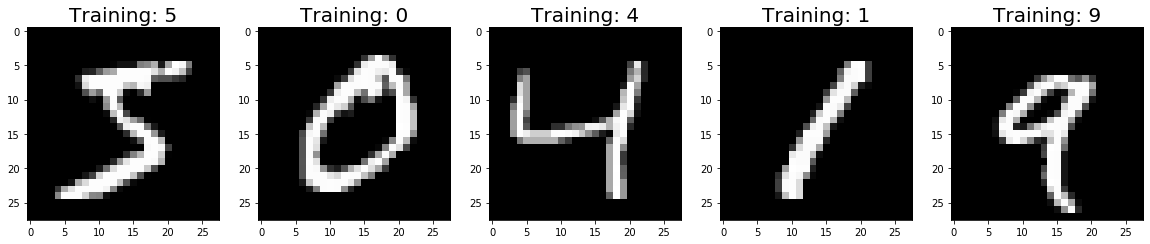

In [12]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(mnist.data[0:5], 
                                           mnist.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: ' + label, fontsize = 20);

### Split into training and test

In [13]:
mnist.target.astype('int')

array([5, 0, 4, ..., 4, 5, 6])

In [14]:
from sklearn.model_selection import train_test_split
X2_train, X2_test, y2_train, y2_test = train_test_split(mnist.data, 
                                                    mnist.target.astype('int'), #targets str to int convert
                                                   test_size=1/7.0,
                                                   random_state=0)

In [15]:
X2_train.shape, X2_test.shape

((60000, 784), (10000, 784))

Are the different classes evenly distributed? We can find this by plotting a histogram of the labels in both test and training datasets.

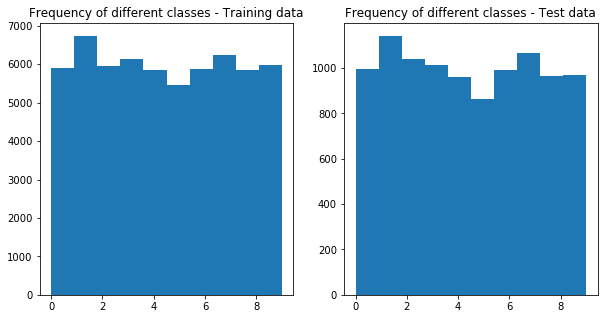

In [77]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.hist(y2_train);
plt.title('Frequency of different classes - Training data');

plt.subplot(1,2,2)
plt.hist(y2_test);
plt.title('Frequency of different classes - Test data');

### Learning

In [57]:
from sklearn.linear_model import LogisticRegression
clf2 = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l1', #lasso regression
                        solver='saga',
                        max_iter=1000,
                        C=50,
                        verbose=2, # output progress
                        n_jobs=5, # parallelize over 5 processes
                        tol=0.01
                         )
clf2

LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=5, penalty='l1',
                   random_state=None, solver='saga', tol=0.01, verbose=2,
                   warm_start=False)

Since there are `10` classes and `12` available cores, we will try to run the learning step in `5` jobs. Earlier, when I did not parallelize, the job did not finish within 1 hour, when I had to put the machine to sleep for a meeting.

In [58]:
%%time
clf2.fit(X2_train, y2_train)

[Parallel(n_jobs=5)]: Using backend ThreadingBackend with 5 concurrent workers.


convergence after 47 epochs took 143 seconds
CPU times: user 9min 30s, sys: 469 ms, total: 9min 30s
Wall time: 2min 22s


[Parallel(n_jobs=5)]: Done   1 out of   1 | elapsed:  2.4min finished


LogisticRegression(C=50, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=5, penalty='l1',
                   random_state=None, solver='saga', tol=0.01, verbose=2,
                   warm_start=False)

**Note**: Since the verbosity is set `>0`, the messages were printed, but they got printed on the terminal, not in the notebook.

Let us see what the classifier has learned

In [29]:
clf2.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [30]:
clf2.coef_.shape

(10, 784)

Get the coefficients for a single class, `1` in this case:

In [59]:
clf2.coef_[1].round(3) # prints weights for 8x8 image for class 0

array([ 0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   , -0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
        0.   ,  0.   ,  0.   ,  0.   ,  0.   , -0.   , -0.   , -0.   ,
       -0.001, -0.001, -0.001,  0.   ,  0.002,  0.004,  0.001,  0.002,
        0.002,  0.001, -0.   , -0.   , -0.   , -0.   , -0.   , -0.   ,
       -0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,  0.   ,
       -0.   , -0.   , -0.   , -0.001, -0.001, -0.002, -0.002, -0.003,
        0.001,  0.002, -0.001,  0.001,  0.002,  0.   , -0.002,  0.   ,
       -0.001, -0.001, -0.001, -0.001, -0.001, -0.   , -0.   ,  0.   ,
      

convergence after 591 epochs took 1805 seconds


In [60]:
clf2.intercept_ # for 10 classes - this is a One-vs-All classification

array([-1.11398188e-04,  1.38709472e-04,  1.16909054e-04, -2.37842193e-04,
        6.62466316e-05,  8.48133979e-04, -4.22181499e-05,  2.66499796e-04,
       -8.62715013e-04, -1.82325388e-04])

In [78]:
clf2.n_iter_[0] # num of iterations before tolerance was reached

47

#### Visualize coefficients as an image

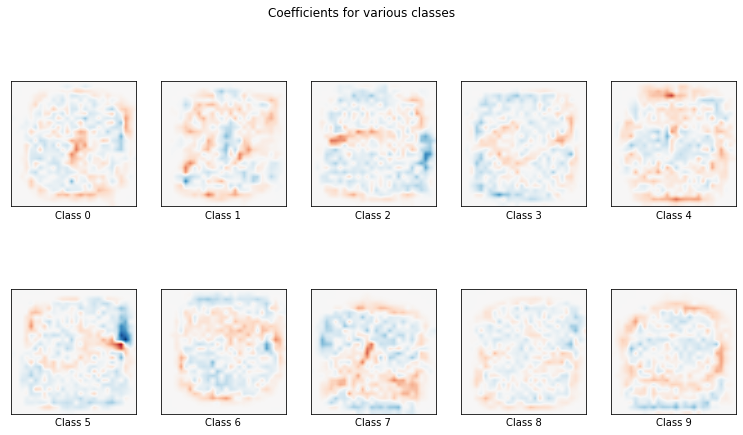

In [62]:
coef = clf2.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(13,7))

for i in range(10): # 0-9
    coef_plot = plt.subplot(2, 5, i + 1) # 2x5 plot

    coef_plot.imshow(coef[i].reshape(28,28), 
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(()) # remove ticks
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes');

### Prediction and scoring

Now predict on unknown dataset and compare with ground truth

In [63]:
print(clf2.predict(X2_test[0:9]))
print(y2_test[0:9])

[0 4 1 2 4 7 7 1 1]
[0 4 1 2 7 9 7 1 1]


Score against training and test data

In [64]:
clf2.score(X2_train, y2_train) # training score

0.9374333333333333

In [65]:
score2 = clf2.score(X2_test, y2_test) # test score
score2

0.9191

Test **Score**: `0.9191` or **91%**

### Confusion matrix

In [46]:
from sklearn import metrics

In [66]:
predictions2 = clf2.predict(X2_test)

cm = metrics.confusion_matrix(y_true=y2_test, 
                         y_pred = predictions2, 
                        labels = clf2.classes_)
cm

array([[ 967,    0,    1,    2,    1,    9,    9,    0,    7,    0],
       [   0, 1114,    5,    3,    1,    5,    0,    4,    7,    2],
       [   3,   13,  931,   18,   11,    1,   15,   10,   34,    4],
       [   1,    5,   33,  894,    0,   26,    2,   12,   27,   13],
       [   1,    2,    5,    1,  897,    1,   11,    9,    7,   28],
       [  10,    2,    6,   30,    9,  747,   16,    6,   30,    7],
       [   7,    3,    6,    0,   11,   18,  938,    1,    5,    0],
       [   2,    5,   13,    2,   11,    2,    1,  982,    4,   42],
       [   4,   18,    8,   18,    6,   25,    9,    2,  861,   12],
       [   3,    5,    6,   10,   35,    7,    2,   32,    9,  860]])

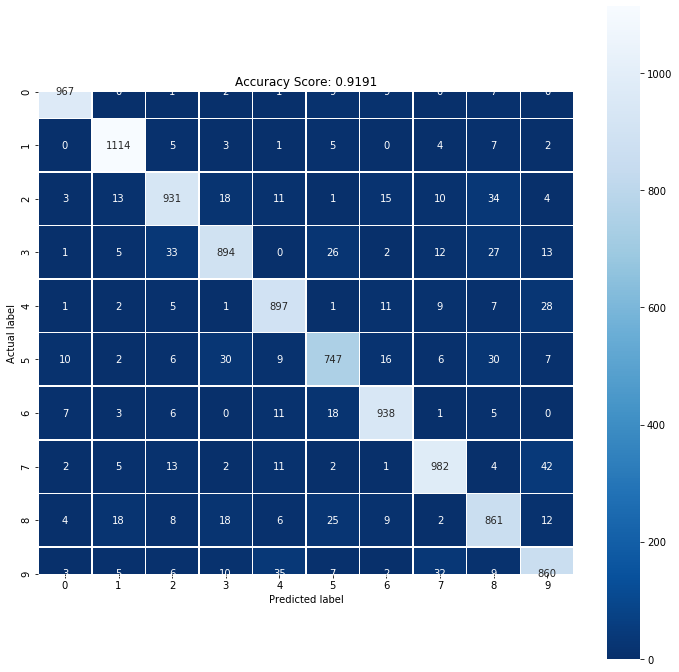

convergence after 5470 epochs took 10856 seconds


In [71]:
import seaborn as sns

plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, 
            linewidths=.5, square = True, cmap = 'Blues_r', fmt='0.4g');

plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score2)
plt.title(all_sample_title);

## Conclusion
This notebook shows performing multi-class classification using logistic regression using one-vs-all technique. When run on MNIST DB, the best accuracy is still just **91%**. There is still scope for improvement.